In [81]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# For better plots
sns.set(style="whitegrid")
%matplotlib inline
pd.set_option('future.no_silent_downcasting', True) # to avoid future warning. 

In [82]:
# Load the data
df = pd.read_csv("data.csv")
df.head()

,tech_company,benefits,workplace_resources,mh_employer_discussion,mh_coworker_discussion,medical_coverage,mental_health,mh_share,age,gender,country
0,Yes,No,I don't know,No,Yes,Yes,Possibly,5,27.0,Female,United Kingdom
1,Yes,Yes,No,No,Yes,Yes,Possibly,4,31.0,Male,United Kingdom
2,Yes,I don't know,No,Yes,Yes,No,Yes,5,36.0,Male,United States of America
3,Yes,Yes,I don't know,Yes,Yes,Yes,Yes,10,22.0,Male,United States of America
4,Yes,Yes,No,No,Yes,Yes,Yes,8,36.0,Female,United States of America


In [83]:
# Initial Cleanup
# Standardize column names
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

# Check for missing or inconsistent data
print(df.isnull().sum())
print(df.dtypes)

tech_company              0
benefits                  0
workplace_resources       0
mh_employer_discussion    0
mh_coworker_discussion    0
medical_coverage          0
mental_health             0
mh_share                  0
age                       0
gender                    0
country                   0
dtype: int64
tech_company               object
benefits                   object
workplace_resources        object
mh_employer_discussion     object
mh_coworker_discussion     object
medical_coverage           object
mental_health              object
mh_share                    int64
age                       float64
gender                     object
country                    object
dtype: object


Text(0.5, 1.0, 'Age Distribution')

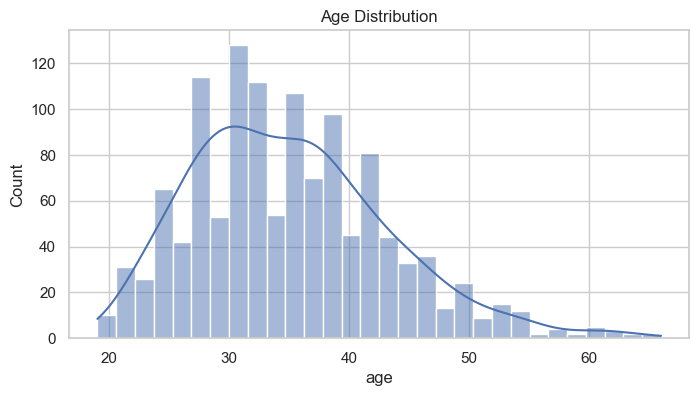

In [84]:
# Age sanity check
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")

Text(0.5, 1.0, 'Respondent Gender Distribution')

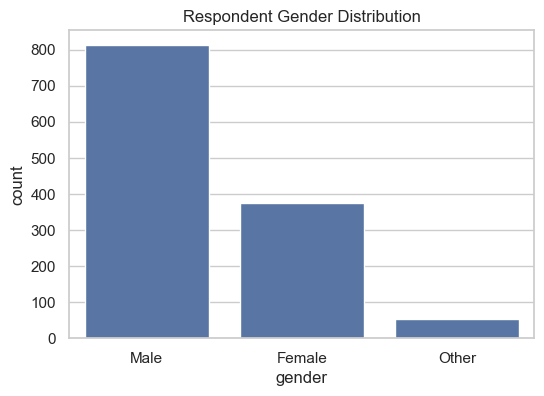

In [85]:
# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', order=df['gender'].value_counts().index)
plt.title("Respondent Gender Distribution")

Age Distribution -- People with Mental Health Conditions

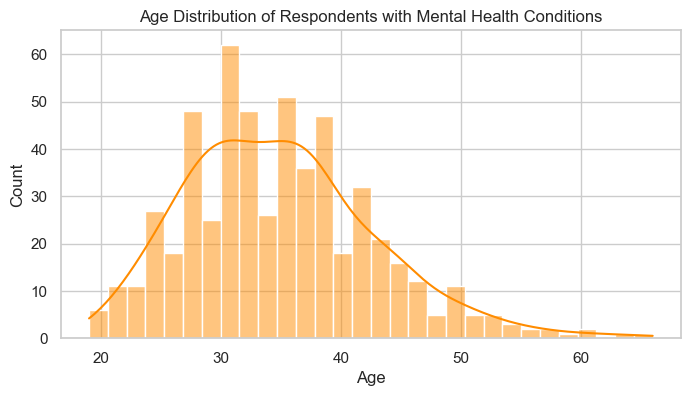

In [86]:
# Age distribution for those who reported mental health condition
mh_positive = model_df[model_df['mental_health'] == 1]

plt.figure(figsize=(8, 4))
sns.histplot(data=mh_positive, x='age', bins=30, kde=True, color='darkorange')
plt.title("Age Distribution of Respondents with Mental Health Conditions")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Gender Breakdown -- People with Mental Health Conditions

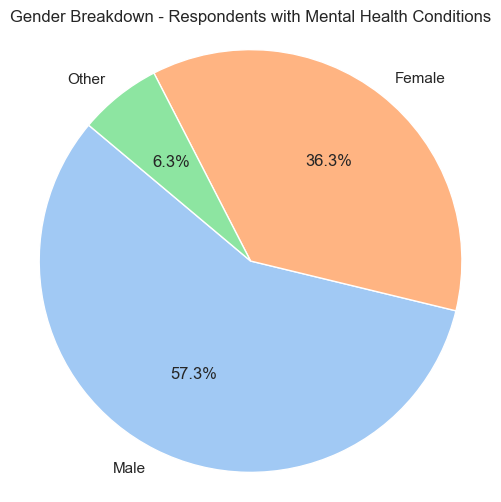

In [87]:
# Filter for those with mental health conditions
mh_positive = model_df[model_df['mental_health'] == 1]

# Clean gender for grouping (optional: standardize categories if needed)
gender_counts = mh_positive['gender'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
colors = sns.color_palette("pastel")[0:len(gender_counts)]
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Gender Breakdown - Respondents with Mental Health Conditions")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Mental Health by Both Age and Gender

<Axes: xlabel='gender', ylabel='age'>

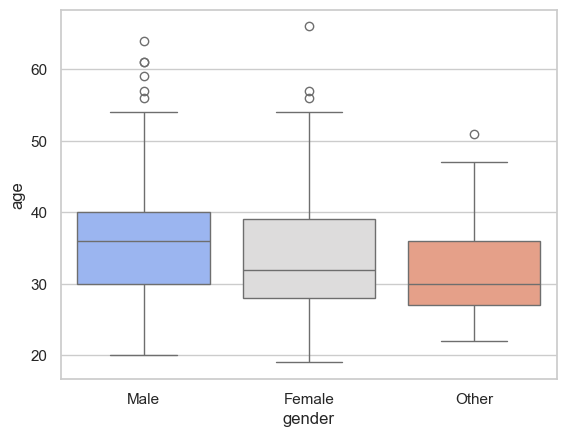

In [88]:
sns.boxplot(data=mh_positive, x='gender', y='age', hue='gender', palette='coolwarm', legend=False)

Text(0.5, 1.0, 'Mental Health Acknowledgement by Tech Company Status')

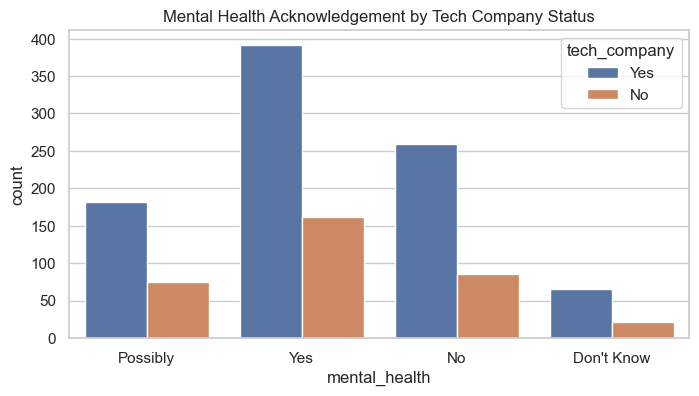

In [89]:
# Tech company effect on mental health support
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="mental_health", hue="tech_company")
plt.title("Mental Health Acknowledgement by Tech Company Status")

Text(0.5, 1.0, 'Discussing MH with Coworkers vs Mental Health Status')

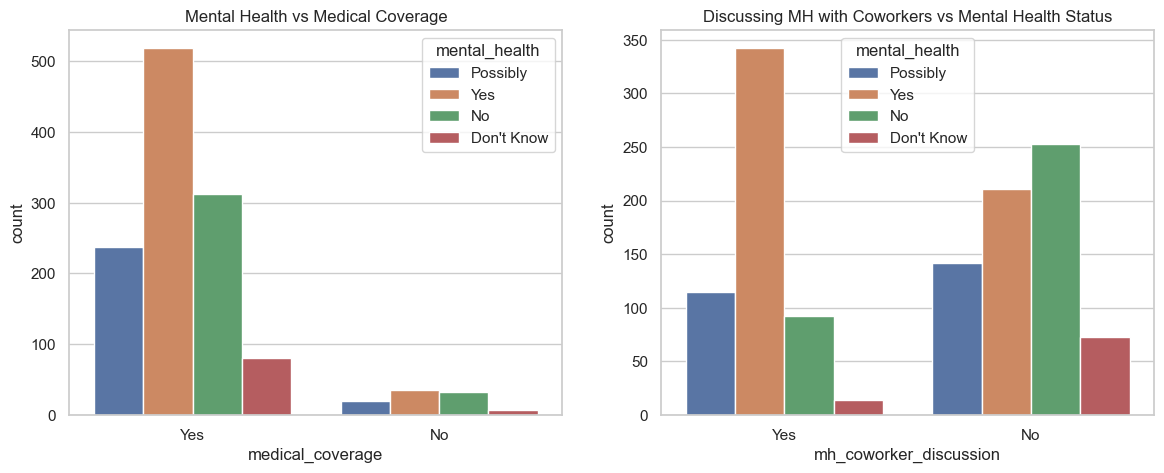

In [90]:
# Mental Health Coverage and Discussion Willingness
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(data=df, x="medical_coverage", hue="mental_health", ax=axes[0])
axes[0].set_title("Mental Health vs Medical Coverage")

sns.countplot(data=df, x="mh_coworker_discussion", hue="mental_health", ax=axes[1])
axes[1].set_title("Discussing MH with Coworkers vs Mental Health Status")

Text(0.5, 1.0, 'Comfort Sharing Mental Health Status vs Employer Discussion')

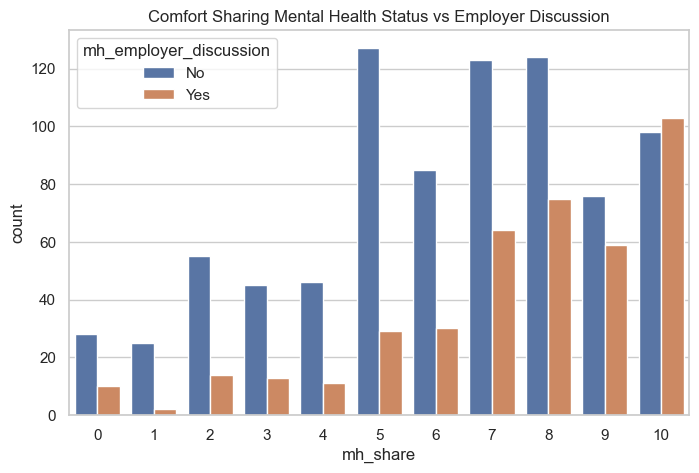

In [91]:
# Mental Health Sharing vs Employer Discussion
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="mh_share", hue="mh_employer_discussion")
plt.title("Comfort Sharing Mental Health Status vs Employer Discussion")

Text(0.5, 1.0, 'Mental Health Status by Top Countries')

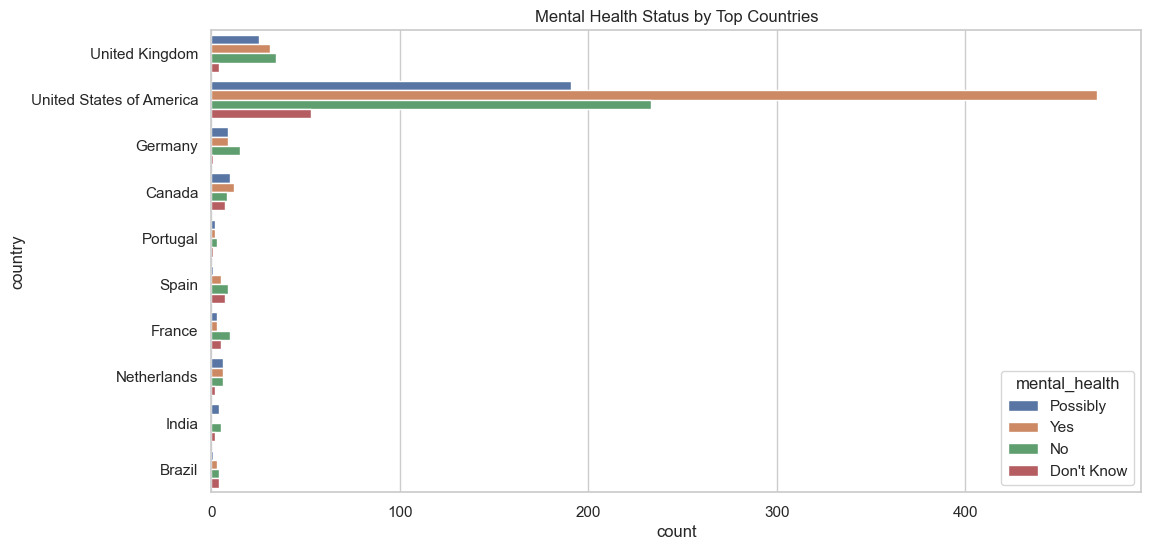

In [92]:
# Country-Level Insights
top_countries = df['country'].value_counts().head(10).index
subset = df[df['country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.countplot(data=subset, y='country', hue='mental_health')
plt.title("Mental Health Status by Top Countries")

Text(0.5, 1.0, 'Age Group vs Employer Mental Health Discussion')

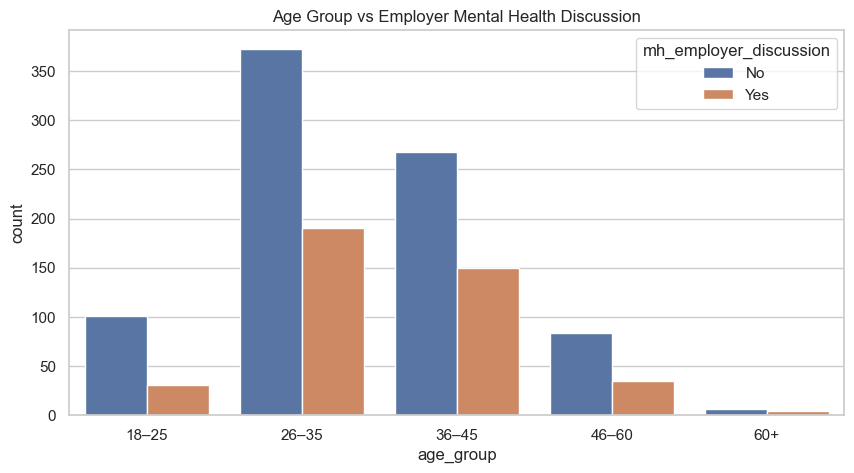

In [93]:
# 10. Age Grouping for deeper analysis
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 60, 100],
                         labels=['18–25', '26–35', '36–45', '46–60', '60+'])

# Discussion behavior by age group
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="age_group", hue="mh_employer_discussion")
plt.title("Age Group vs Employer Mental Health Discussion")

Text(0.5, 1.0, 'Correlation Heatmap')

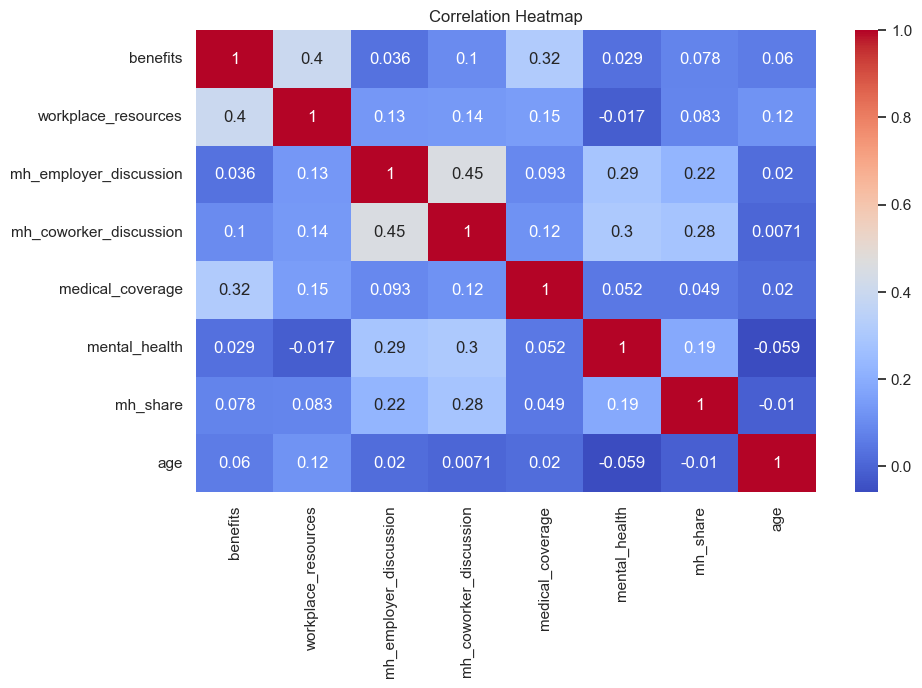

In [94]:
# Heatmap of correlation (after encoding categorical yes/no/don't know)
pd.set_option('future.no_silent_downcasting', True)
df_encoded = df.replace({'Yes': 1, 'No': 0, "Don't Know": np.nan, "Possibly": 0.5, "I don't know": np.nan})
corr_matrix = df_encoded[['benefits','workplace_resources','mh_employer_discussion',
                          'mh_coworker_discussion','medical_coverage','mental_health','mh_share','age']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

Diving deeper with more advanced analysis and Machine learning 

1. Feature Engineering

In [95]:
# Encode categorical responses
mapping = {
    'Yes': 1, 'No': 0, 'Possibly': 0.5, "Don't Know": np.nan, "I don't know": np.nan
}
df_encoded = df.replace(mapping)

# Drop rows with missing values in key modeling features and make a true copy
model_df = df_encoded.dropna(subset=['mental_health', 'age', 'tech_company', 'medical_coverage']).copy()

# Encode gender as binary: 1 if Female, 0 otherwise (safe assignment)
model_df.loc[:, 'is_female'] = model_df['gender'].str.lower().apply(lambda x: 1 if 'female' in x else 0)
                                                                   
# Preview the final DataFrame used for modeling
print(model_df[['age', 'gender', 'tech_company', 'medical_coverage', 'mental_health', 'is_female']].head(10))

    age  gender tech_company medical_coverage mental_health  is_female
0  27.0  Female            1                1           0.5          1
1  31.0    Male            1                1           0.5          0
2  36.0    Male            1                0             1          0
3  22.0    Male            1                1             1          0
4  36.0  Female            1                1             1          1
5  38.0  Female            1                1             0          1
6  40.0    Male            0                1             1          0
7  35.0    Male            1                1             1          0
8  22.0  Female            1                1             1          1
9  28.0    Male            0                1             1          0


2. Dimensionality Reduction & Clustering

Text(0.5, 1.0, 't-SNE Clustering of Respondents')

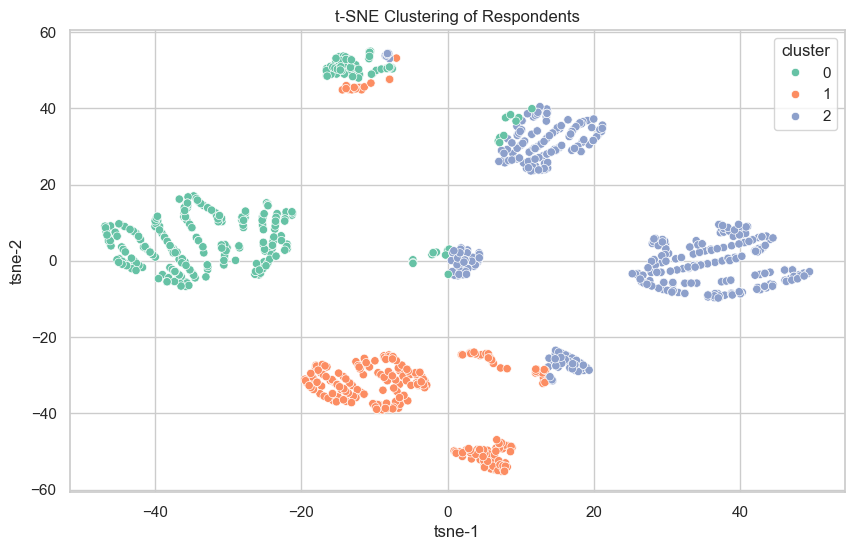

In [96]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = model_df[['age','tech_company','medical_coverage','mh_coworker_discussion','mh_employer_discussion','mh_share']]
X_scaled = StandardScaler().fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)
model_df['tsne-1'] = tsne_result[:,0]
model_df['tsne-2'] = tsne_result[:,1]

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
model_df['cluster'] = kmeans.fit_predict(X_scaled)

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=model_df, x='tsne-1', y='tsne-2', hue='cluster', palette='Set2')
plt.title("t-SNE Clustering of Respondents")

3. Predictive Model: Random Forest

In [97]:
print("Unique values in 'mental_health':", model_df['mental_health'].unique())
print("Value counts:\n", model_df['mental_health'].value_counts(dropna=False))

Unique values in 'mental_health': [0.5 1 0]
Value counts:
 mental_health
1      553
0      345
0.5    257
Name: count, dtype: int64


In [98]:
# Filter to include only 0 and 1 responses for mental_health
model_df_clean = model_df[model_df['mental_health'].isin([0, 1])].copy()

# Make sure target is of integer type (not float)
model_df_clean['mental_health'] = model_df_clean['mental_health'].astype(int)

In [99]:
y = model_df_clean['mental_health']
X = model_df_clean[['age', 'tech_company', 'medical_coverage', 
                    'mh_coworker_discussion', 'mh_employer_discussion', 
                    'mh_share', 'is_female']]

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.42      0.47        67
           1       0.69      0.78      0.73       113

    accuracy                           0.64       180
   macro avg       0.61      0.60      0.60       180
weighted avg       0.63      0.64      0.63       180

